In [23]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [24]:
importlib.reload(wrf)

run='run_land_t06'
run='run_CTRL'
# t0=3
# tmax=4
# dt=1
# avgt=1
# flist='wrfout_d03_2007-09-06_03:00:00'
# hrs=np.arange(t0,tmax,dt).tolist()
# flist=wrf.getflist(run)[t0:tmax:dt]

flist=['wrfout_d03_2007-09-05_03:00:00']

r=wrf.getRcoord(wrf.wopath(run,flist[0]))
vr=[wrf.getWRF(run,fname,'vr',type='azdwcm',z='full',force=True) for fname in flist]

Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.vr.azdwcm.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.vr.dwcm.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.H.raw.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.P.raw.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.T.raw.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.TH.raw.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.P.raw.npy
Creating: run_CTRL/wrfout_d03_2007-09-05_03:00:00.vr.raw.npy


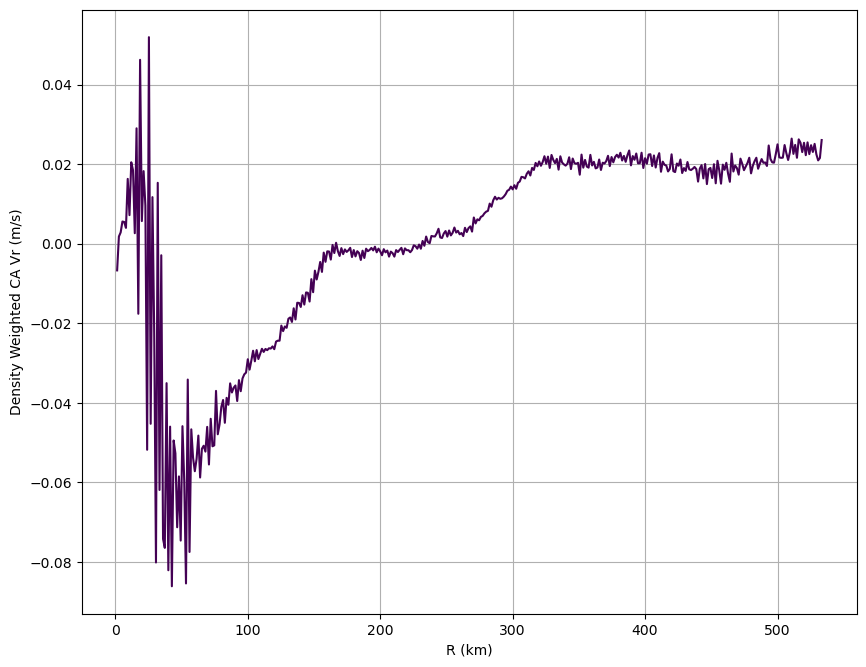

In [25]:
fig,axs=plt.subplots(1,1,figsize=(10,8),dpi=100)
def plot_sub(ax,xs,ylab):
    for n,x in enumerate(xs):
        ax.plot(r,x,color=cmap(n))
        ax.grid(True)
        ax.set_xlabel('R (km)')
        ax.set_ylabel(ylab)
cmap=cm.get_cmap('viridis',len(vr))

plot_sub(axs,vr, 'Density Weighted CA Vr (m/s)' )

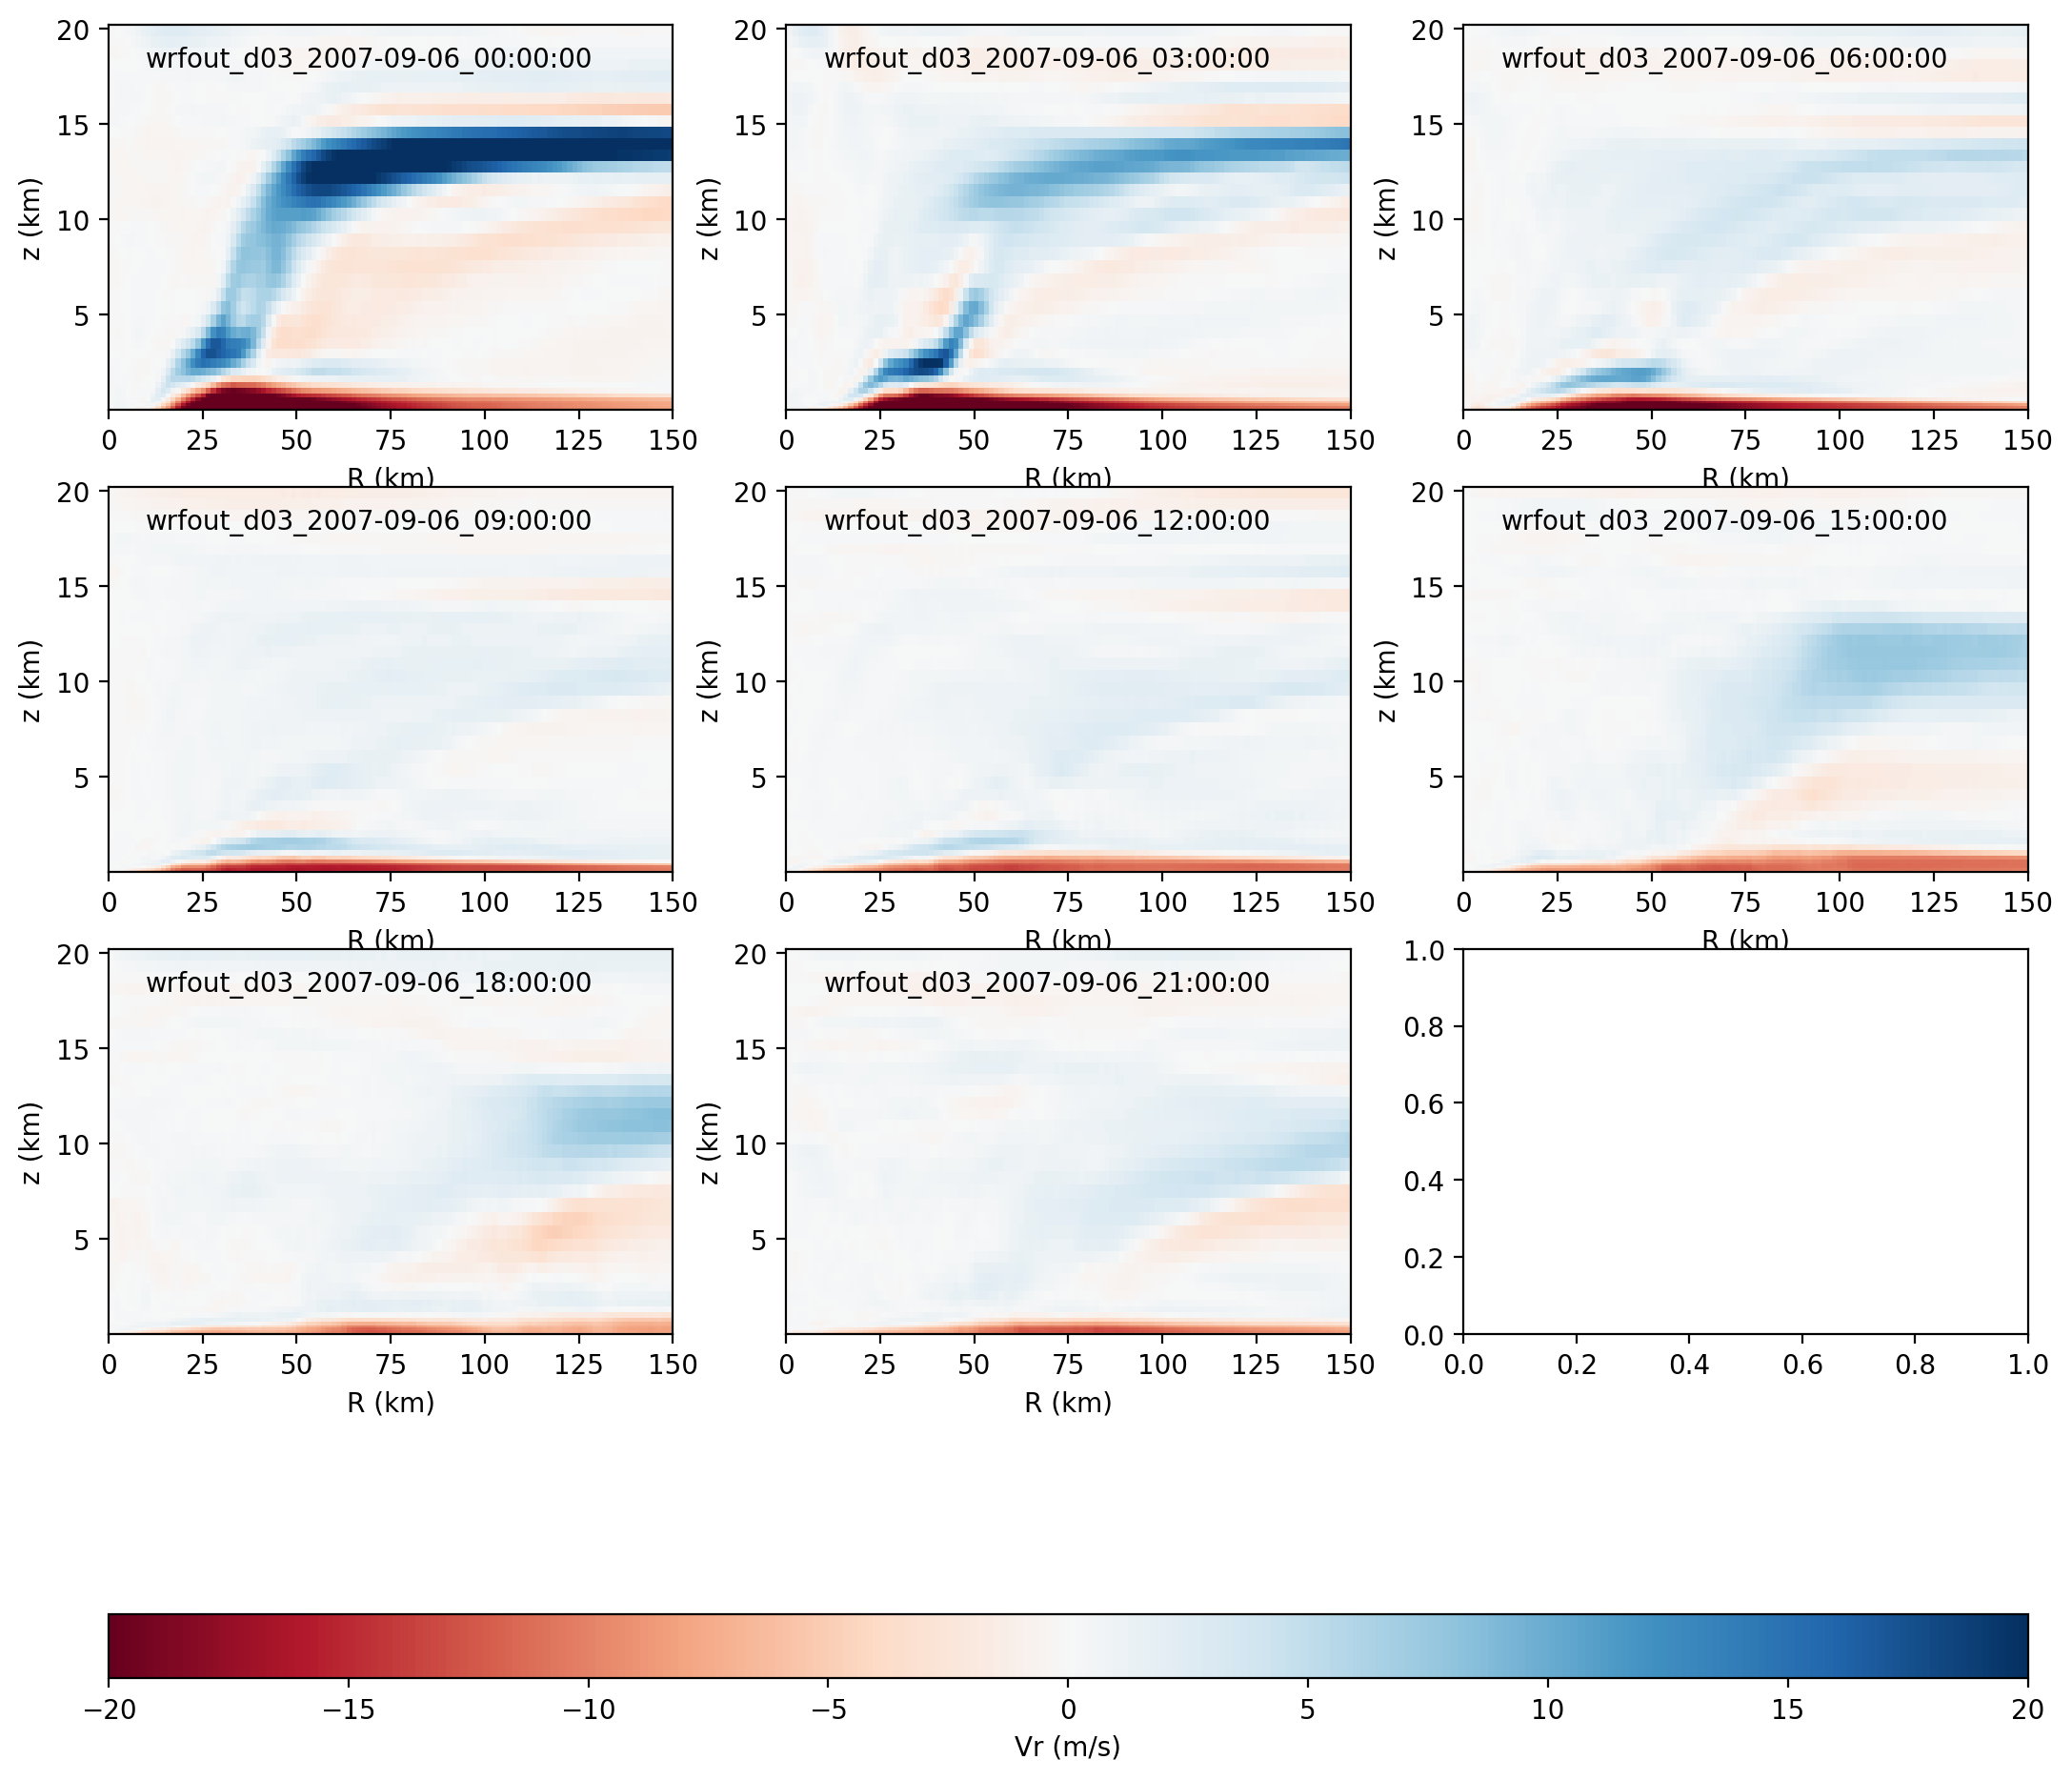

In [77]:
fig,axs=plt.subplots(3,3,figsize=(13,13),dpi=200)
cl=20

for n,fname in enumerate(flist[0:24:3]):
    ax=axs.flat[n]
    vr=wrf.getWRF(run,fname,'vr',z='full',type='az')
    z=wrf.getHeightCoord(wrf.wopath(run,fname))
    r=wrf.getRcoord(wrf.wopath(run,fname))
    im=ax.pcolormesh(r,z[1:]/1000,vr.T,cmap=plt.get_cmap('RdBu'),shading='nearest')
    im.set_clim(-cl,cl)
    ax.set_xlim(0,150)
    ax.set_xlabel('R (km)')
    ax.set_ylabel('z (km)')
    ax.text(10,18,fname)
    
fig.colorbar(im,ax=axs,orientation='horizontal',aspect=30,label='Vr (m/s)')